In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# uba file cvs menjadi dataframe 
df = pd.read_csv('Mall_Customers.csv') 

# show first 3 row 
df.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6


In [7]:

df.keys()

df = df.rename(columns={'Gender': 'gender',
                        'Age' : 'age',
                        'Annual Income (k$)' : 'annual_income',
                        'Spending Score (1-100)': 'spending_score'})

# rename categorical to numeric 
df['gender'].replace(['Female', 'Male'], [0,1] , inplace=True)

# show preprocessed data 
df.head(3)

,CustomerID,gender,age,annual_income,spending_score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6


Text(0, 0.5, 'Intertia')

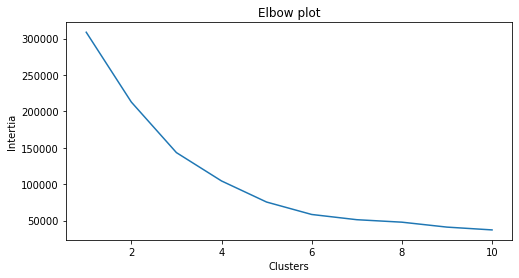

In [9]:
from sklearn.cluster import KMeans 
# remove kolom customer id dan gender 
X = df.drop(['CustomerID', 'gender'] , axis = 1) 

# membuat list yang berisi inertia 
clusters = [] 
for i in range(1,11):
  km = KMeans(n_clusters = i ).fit(X) 
  clusters.append(km.inertia_) 

# create inertia plot 

fig, ax = plt.subplots(figsize=(8,4)) 
sns.lineplot(x=list(range(1,11)), y = clusters, ax = ax ) 
ax.set_title('Elbow plot') 
ax.set_xlabel('Clusters') 
ax.set_ylabel('Intertia')



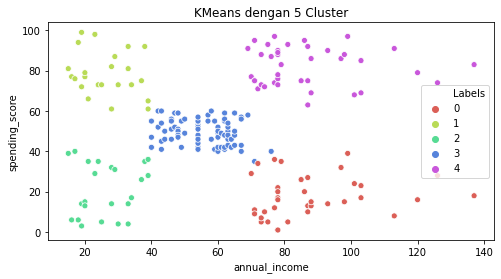

In [10]:
km5 = KMeans(n_clusters = 5).fit(X) 
# menambahkankolom label pad adataset 
X['Labels'] = km5.labels_ 

# create KMeans Visualization with 5 cluster 
plt.figure(figsize = (8,4)) 
sns.scatterplot(X['annual_income'] , 
                X['spending_score'], 
                hue = X['Labels'],
                palette = sns.color_palette('hls', 5 ))

plt.title('KMeans dengan 5 Cluster') 
plt.show()